#  1. Data Loading and Initial Exploration

This project aims to predict real estate sales prices using supervised machine learning techniques. Leveraging a dataset spanning from 2001 to 2022, the goal is to develop a model that accurately estimates property prices based on various features

The dataset comprises real estate sales records from 2001 to 2022, including features such as property type, location, list year, and sale price. This rich dataset provides a comprehensive view of the real estate market over two decades .



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [7]:
dataSetPath = "Real_Estate_Sales_2001-2022_GL.csv"
df = pd.read_csv(dataSetPath)
print(df.info())


C:\Users\habip\AppData\Local\Temp\ipykernel_22544\3477614537.py:2: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataSetPath)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB
None


In [8]:
print(df.head())

   Serial Number  List Year Date Recorded     Town          Address  \
0        2020177       2020    04/14/2021  Ansonia    323 BEAVER ST   
1        2020225       2020    05/26/2021  Ansonia   152 JACKSON ST   
2        2020348       2020    09/13/2021  Ansonia  230 WAKELEE AVE   
3        2020090       2020    12/14/2020  Ansonia      57 PLATT ST   
4         210288       2021    06/20/2022     Avon   12 BYRON DRIVE   

   Assessed Value  Sale Amount  Sales Ratio Property Type Residential Type  \
0        133000.0     248400.0       0.5354   Residential    Single Family   
1        110500.0     239900.0       0.4606   Residential     Three Family   
2        150500.0     325000.0       0.4630    Commercial              NaN   
3        127400.0     202500.0       0.6291   Residential       Two Family   
4        179990.0     362500.0       0.4965   Residential            Condo   

  Non Use Code Assessor Remarks OPM remarks  \
0          NaN              NaN         NaN   
1         

In [9]:
print(df.describe())
print(f"\nDataset shape: {df.shape}")
print("\nMissing values:")
print(df.isnull().sum())

       Serial Number     List Year  Assessed Value   Sale Amount   Sales Ratio
count   1.097629e+06  1.097629e+06    1.097629e+06  1.097629e+06  1.097629e+06
mean    5.370357e+05  2.011218e+03    2.818016e+05  4.053146e+05  9.603926e+00
std     7.526074e+06  6.773485e+00    1.657890e+06  5.143492e+06  1.801664e+03
min     0.000000e+00  2.001000e+03    0.000000e+00  0.000000e+00  0.000000e+00
25%     3.071300e+04  2.005000e+03    8.909000e+04  1.450000e+05  4.778667e-01
50%     8.070600e+04  2.011000e+03    1.405800e+05  2.330000e+05  6.105663e-01
75%     1.703410e+05  2.018000e+03    2.282700e+05  3.750000e+05  7.707200e-01
max     2.000500e+09  2.022000e+03    8.815100e+08  5.000000e+09  1.226420e+06

Dataset shape: (1097629, 14)

Missing values:
Serial Number             0
List Year                 0
Date Recorded             2
Town                      0
Address                  51
Assessed Value            0
Sale Amount               0
Sales Ratio               0
Property Type     

# 2. Exploratory Data Analysis (EDA)

### 2.1 Missing Values Visualization

To identify the presence and distribution of missing values across the dataset, we employed a heatmap visualization using the seaborn library. This visual inspection enables us to quickly pinpoint which features contain null entries and to what extent.

Date Recorded             2
Address                  51
Property Type        382446
Residential Type     398389
Non Use Code         784178
Assessor Remarks     926401
OPM remarks         1084598
Location             799518
dtype: int64


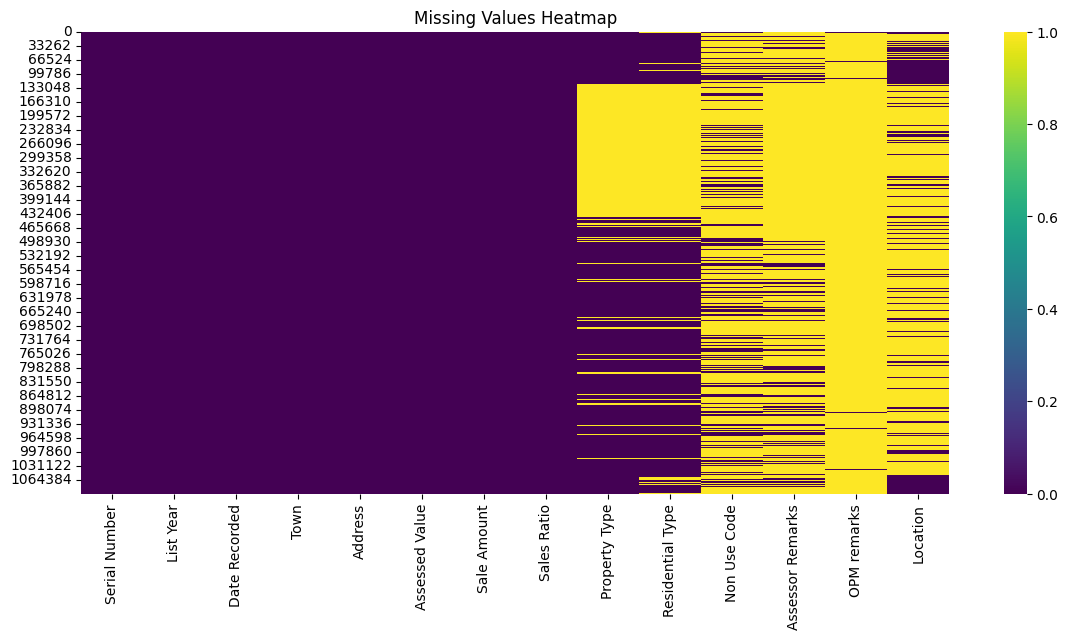

In [10]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

##### Observations:
- A significant number of missing values are observed in categorical features such as Property Type, Residential Type, Non Use Code, and Assessor Remarks.

- Numerical and date-related columns like Sale Amount, Assessed Value, and List Year have little to no missing data.

- The presence of such extensive missingness in certain columns may require imputation strategies or even exclusion from the final model depending on their importance and cardinality.

- Proper handling of missing data is crucial to ensure the reliability and robustness of the predictive model.

### 2.2 Correlation Analysis Between Numerical Features


To explore the linear relationships between numerical variables in the dataset, we computed the correlation matrix and visualized it using a heatmap. This analysis helps identify which features are most strongly associated with the target variable Sale Amount, as well as with each other.

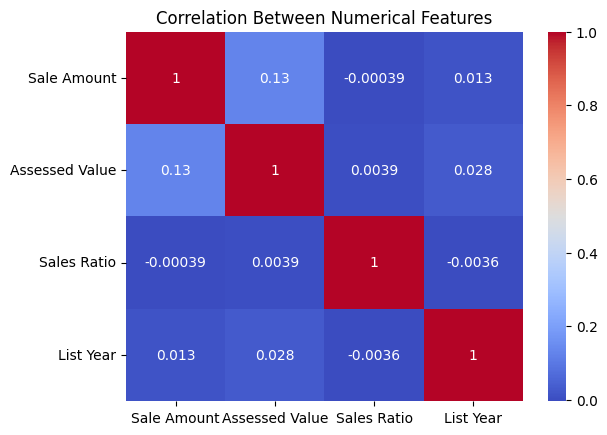

In [137]:
numerical_cols = ["Sale Amount", "Assessed Value", "Sales Ratio", "List Year"]
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")
plt.title("Correlation Between Numerical Features")
plt.show()

##### Observations:
- A significant number of missing values are observed in categorical features such as Property Type, Residential Type, Non Use Code, and Assessor Remarks.

- Numerical and date-related columns like Sale Amount, Assessed Value, and List Year have little to no missing data.

- The presence of such extensive missingness in certain columns may require imputation strategies or even exclusion from the final model depending on their importance and cardinality.

- Proper handling of missing data is crucial to ensure the reliability and robustness of the predictive model.

### 2.3 Distribution of Key Financial Variables

In this section, we examine the distribution of three key numerical features: Sale Amount, Assessed Value, and Sales Ratio. Understanding the spread and skewness of these variables provides valuable insights into pricing behavior and potential outliers in the real estate market.

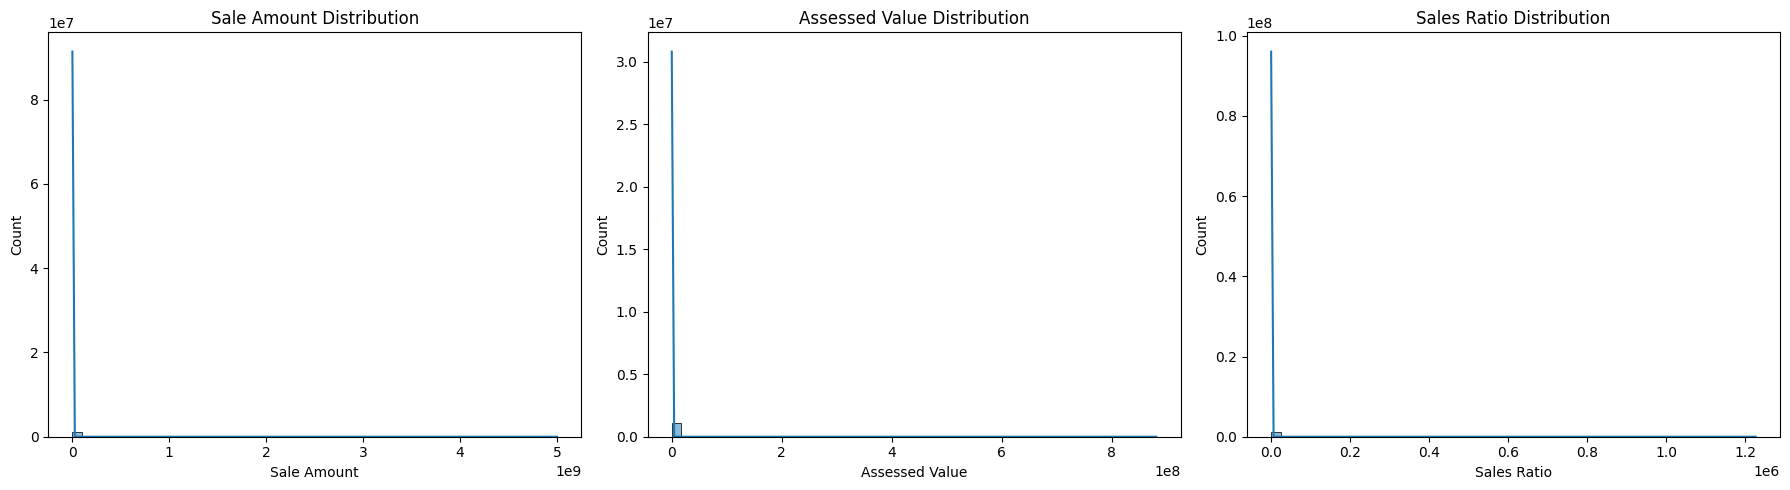

In [138]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))
sns.histplot(df["Sale Amount"], bins = 50, kde = True, ax = axs[0])
axs[0].set_title("Sale Amount Distribution")
sns.histplot(df["Assessed Value"], bins = 50, kde = True, ax = axs[1])
axs[1].set_title("Assessed Value Distribution")
sns.histplot(df["Sales Ratio"], bins = 50, kde = True, ax = axs[2])
axs[2].set_title("Sales Ratio Distribution")
plt.tight_layout()
plt.show()

##### Observations:
- Sale Amount: The distribution is right-skewed, indicating that most property sales fall within a lower price range, with a few high-value transactions.

- Assessed Value: Shows a similar skewed distribution pattern, which suggests that property assessments follow a comparable structure to actual sale amounts.

- Sales Ratio: This metric, which compares the sale price to the assessed value, is centered around a peak but may contain some outliers. A wide range of values could reflect inconsistencies in valuation or market dynamics.

- These insights are essential for informing feature engineering and potential transformations (e.g., log-scaling) in later stages of the modeling pipeline.

### 2.4 Top 15 Towns by Average Sale Amount

The bar chart below highlights the top 15 towns with the highest average sale amounts over the 2001–2022 period.

<Axes: title={'center': 'Top 15 Towns by Avg Sale Amount'}, xlabel='Town'>

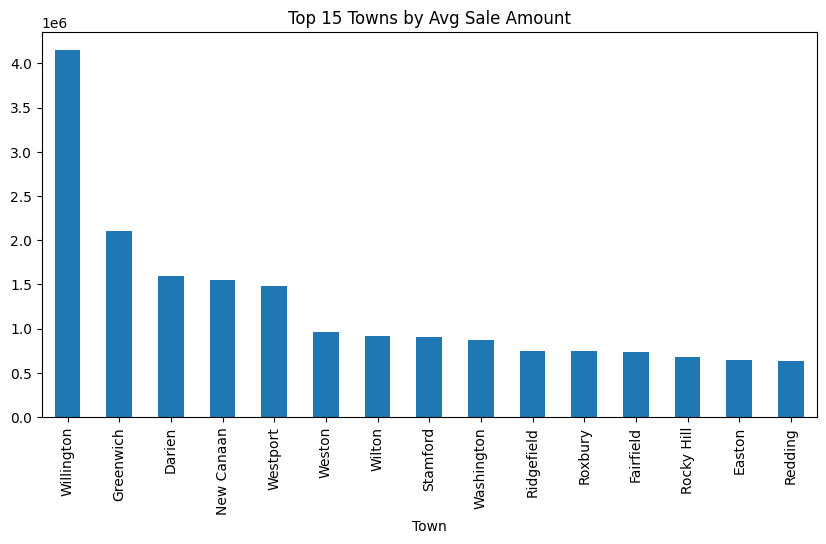

In [139]:
town_counts = df["Town"].value_counts().head(15)
town_counts.plot(kind = "bar", figsize = (10,5), title = "Top 15 Towns by Avarage Sale Amount") 

avg_price_by_town = df.groupby("Town")["Sale Amount"].mean().sort_values(ascending = False).head(15)
avg_price_by_town.plot(kind = "bar", figsize = (10, 5), title = "Top 15 Towns by Avg Sale Amount")

##### Observations:
- Willington ranks far above all other towns, with an average sale amount exceeding $4 million. This is a significant outlier and may warrant further investigation to determine if it is due to unique property transactions, data recording anomalies, or exceptionally high-value sales.

- Greenwich, Darien, and New Canaan also feature prominently, each with average sale prices above $1.5 million. These towns are known for their affluent residential neighborhoods, which aligns with these results.

- Other towns such as Westport, Stamford, and Wilton maintain relatively high average sale values, generally in the $800,000–$1.5 million range.

- The sharp drop from the first to second-ranked town suggests skewness or the presence of extreme values in certain areas.

- This visualization is instrumental in identifying geographical disparities in property values, which can inform investment strategies, tax assessment analyses, and urban planning decision

### 2.5 Sale Amount Distribution by Property Type

This box plot visualization examines the distribution of sale amounts across different property types in the Connecticut real estate market. The analysis provides insights into pricing patterns and market segments for various property categories.

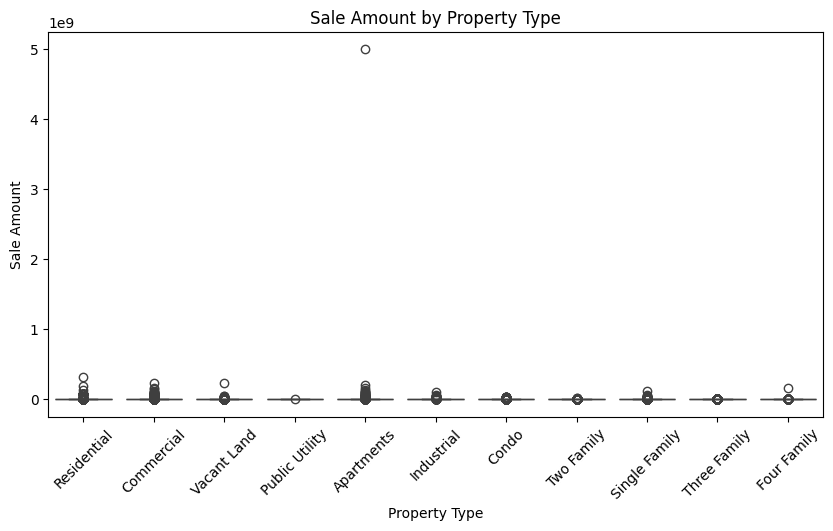

In [140]:
plt.figure(figsize = (10,5))
sns.boxplot(x = "Property Type", y = "Sale Amount", data = df)
plt.xticks(rotation = 45)
plt.title("Sale Amount by Property Type")
plt.show()

##### Observations:
- Public Utility properties exhibit the highest median sale amounts and demonstrate the greatest price variability, with several extreme outliers reaching up to $5 million. This suggests that utility infrastructure transactions involve substantial capital investments and can vary significantly based on asset scale and strategic importance.

- Residential properties show a relatively concentrated distribution with moderate variability, indicating a stable market segment with consistent pricing patterns. The presence of some outliers suggests occasional high-value luxury transactions.

- Commercial and Apartments categories display similar distribution patterns with moderate median values and several outliers, reflecting the diverse nature of commercial real estate investments ranging from small retail spaces to large commercial complexes.

- Vacant Land transactions show lower median values but considerable variability, which is typical for undeveloped properties where value depends heavily on location, zoning potential, and development prospects.

- Single Family, Two Family, Three Family, and Four Family properties cluster in the lower price ranges with relatively tight distributions, representing the traditional residential housing market segments.

- Industrial and Condo properties demonstrate compact distributions with fewer extreme values, suggesting more standardized pricing within these market segments.

- The significant outliers across multiple property types indicate the presence of premium or unique properties that command exceptional prices, which may require special consideration during model development to prevent skewing of predictive algorithms.

### 2.6 Temporal Analysis

#### Market Volume Trends
Annual sales data reveals peak activity during 2004-2005 with approximately 75,000-80,000 transactions. A significant decline occurred during 2008-2012, dropping to 30,000-40,000 sales annually, clearly reflecting the 2008 global financial crisis impact. Recent years show recovery to 60,000-65,000 transaction levels.

#### Price Evolution and Crisis Effects
Monthly average sale amounts remained stable between 200,000-600,000 from 2002-2016. The 2007-2009 period shows notable volatility coinciding with the mortgage crisis and global recession. Post-2017 data shows dramatic increases, reaching 1.7 million peaks, while the sharp spike around 2019 may reflect pre-pandemic market speculation or policy changes.

#### Economic Crisis Patterns
The graphs clearly demonstrate how major economic crises affected the market: the 2008 financial crisis caused both reduced transaction volumes and price instability, while the 2019-2020 period shows extreme price volatility potentially linked to pandemic-related economic disruptions and monetary policy responses.

#### Market Transformation
The inverse relationship between transaction volume and average sale values suggests market evolution toward higher-value, lower-volume transactions. These patterns align with typical crisis-recovery cycles where markets consolidate and shift toward premium segments following economic shocks.

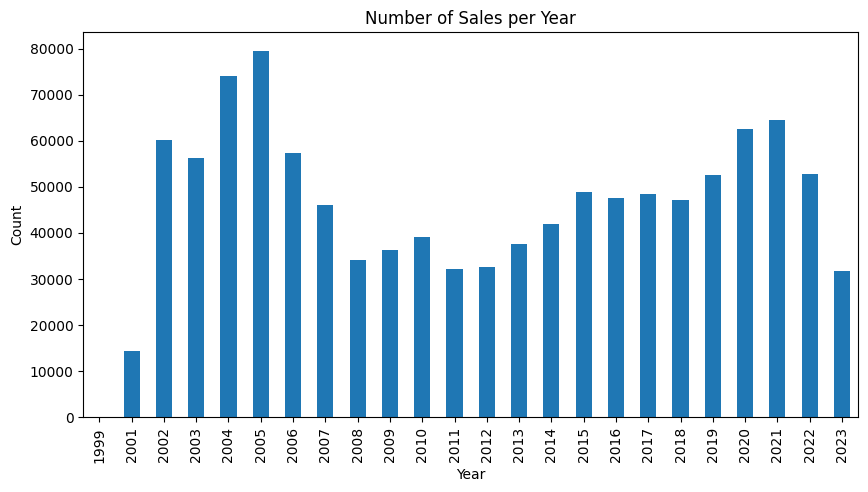

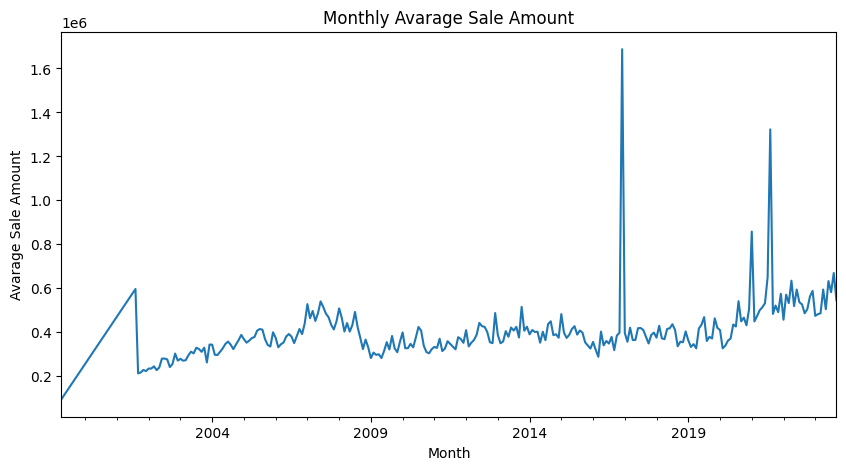

In [141]:
df["Date Recorded"] = pd.to_datetime(df["Date Recorded"], errors="coerce")
df["Year"] = df["Date Recorded"].dt.year.astype("Int64")
df["Month"] = df["Date Recorded"].dt.to_period("M")

sales_per_year = df["Year"].value_counts().sort_index()
sales_per_year.plot(kind = "bar", figsize = (10,5), title = "Number of Sales per Year")
plt.ylabel("Count")
plt.show()

monthly_avg_sales = df.groupby("Month")["Sale Amount"].mean()
monthly_avg_sales.plot(figsize = (10,5), title = "Monthly Avarage Sale Amount")
plt.ylabel("Avarage Sale Amount")
plt.show()

### Geographic Data Visualization Analysis

#### Geographic Distribution Mapping
This code creates an interactive map visualization of real estate sales data across Connecticut using the Folium library. The script processes location data stored in POINT format, extracts latitude and longitude coordinates, and plots each property sale as a blue circle marker on the map centered around Connecticut (41.5°N, 72.7°W).

#### Key Findings from the Visualization
##### Spatial Concentration Patterns
The resulting map reveals a highly concentrated cluster of property sales in the central-southern region of Connecticut, with dense blue markers forming a distinct geographic pattern. This concentration likely represents major metropolitan areas including Hartford, New Haven, and surrounding suburban communities.
##### Market Activity Distribution
- High-density zones: Central Connecticut shows the heaviest concentration of transactions
- Sparse coverage: Northern and eastern regions display significantly fewer sales points
- Urban corridor effect: The distribution follows major transportation routes and urban development patterns

The high percentage of missing location data severely limits the reliability of any spatial conclusions and renders the dataset inadequate for training robust machine learning models that depend on geographic features. For meaningful spatial analysis and ML applications, a more complete dataset with higher coordinate coverage would be essential. The current visualization represents only a fraction of actual market activity and should be interpreted with significant caution.

In [142]:
sample_size = 3000
df_sample = df.dropna(subset=["Location"]).sample(n=min(sample_size, len(df.dropna(subset=["Location"]))), random_state=42)

m = folium.Map(location=[41.5, -72.7], zoom_start=8)

for _, row in df_sample.iterrows():
    try:
        lon, lat = (
            pd.Series(row["Location"])
            .str.extract(r"POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)")
            .astype(float)
            .values[0]
        )
        folium.CircleMarker(
            location=[lat, lon],
            radius=1,  
            popup=f"${row['Sale Amount']}",
            color="Blue",
            fill=True,
            fill_color="Blue",
        ).add_to(m)
    except ValueError:
        print(f"Geçersiz koordinat: {row['Location']}")

m.save("map.html")
print(f"Map created with {len(df_sample)} data points")

Map created with 3000 data points


# 3.  DATA PREPROCESSİNG

This section focuses on preparing our real estate dataset for machine learning by systematically addressing data quality challenges that could undermine model reliability. Effective preprocessing is fundamental to achieving accurate predictions, as machine learning algorithms are inherently limited by the quality and consistency of their training data.

Our preprocessing approach implements a comprehensive data preparation pipeline designed to transform raw real estate records into a robust, model-ready format:

#### Data Quality Assessment and Cleaning:
- Implementing targeted imputation strategies: mean/median for continuous variables like sale prices , mode imputation for categorical features such as property types and residential types.
- Establishing clear documentation protocols for all data transformation decisions to ensure analytical reproducibility

#### Statistical Outlier Management:

- Deploying the Z-score methodology to detect anomalous values, flagging observations with absolute Z-scores exceeding 3 standard deviations from the mean
- Incorporating real estate domain expertise to differentiate between legitimate high-value properties and data entry errors
- Implementing logarithmic transformation techniques for extreme values to normalize distributions and reduce the impact of outliers while preserving valuable information from luxury property segments

### Geographic Data Validation:
- Validating coordinate accuracy by ensuring all location data falls within expected geographic boundaries
- Implementing coordinate system standardization and removing records with obviously incorrect spatial references
- Addressing the critical 70% missing location data challenge through strategic feature engineering and alternative geographic indicators

### Feature Standardization and Engineering:
- Applying StandardScaler normalization to ensure numerical features contribute proportionally to model training
- Creating derived features such as economic eras  and price segments. 
- Encoding categorical variables using appropriate techniques (one-hot encoding for nominal features, target encoding for high-cardinality categorical variables like town names)

### Dataset Validation and Documentation:
- Establishing a clean, consistently structured dataset optimized for machine learning workflows
- Implementing comprehensive preprocessing documentation for model transparency and future reproducibility
- Creating validation checkpoints to verify data integrity throughout the transformation process
This systematic preprocessing framework addresses the most common data quality pitfalls in real estate analytics, establishing a solid analytical foundation for subsequent feature engineering and model development phases.

In [143]:
df.dropna(subset=['Date Recorded'], inplace=True)
df.dropna(subset=['Year'], inplace=True)
df.dropna(subset=['Month'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1097627 entries, 0 to 1097628
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Serial Number     1097627 non-null  int64         
 1   List Year         1097627 non-null  int64         
 2   Date Recorded     1097627 non-null  datetime64[ns]
 3   Town              1097627 non-null  object        
 4   Address           1097578 non-null  object        
 5   Assessed Value    1097627 non-null  float64       
 6   Sale Amount       1097627 non-null  float64       
 7   Sales Ratio       1097627 non-null  float64       
 8   Property Type     715183 non-null   object        
 9   Residential Type  699240 non-null   object        
 10  Non Use Code      313451 non-null   object        
 11  Assessor Remarks  171228 non-null   object        
 12  OPM remarks       13031 non-null    object        
 13  Location          298111 non-null   object     

In [144]:
residential = df["Property Type"] == "Residential"
df.loc[residential, "Property Type"] = df.loc[residential, "Residential Type"]

df = df.drop(columns = "Residential Type")

In our dataset analysis, we identified significant redundancy between Property Type and Residential Type columns, where some rows contain identical values (e.g., "Single Family" in both columns) while others show "Residential" in Property Type with specific subtypes in Residential Type (e.g., "Single Family", "Condo"). Since approximately 700,000 remaining rows contain None or NaN values in Residential Type, we will consolidate these columns by removing "Residential" entries from Property Type, replacing them with their corresponding specific values from Residential Type, and then permanently deleting the Residential Type column to eliminate redundancy while preserving all valuable categorical information.

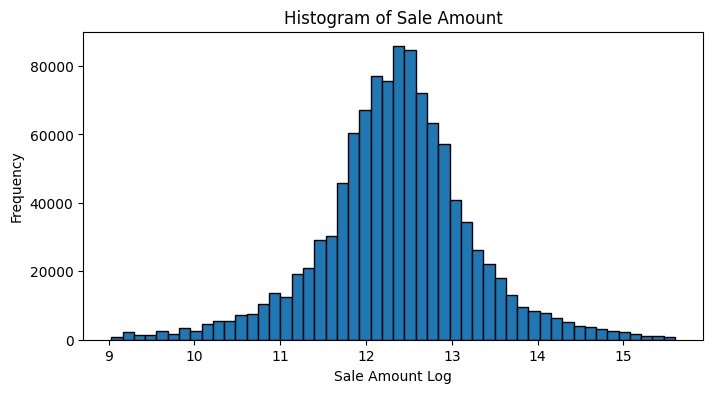

In [145]:
df["Property Type"] = df["Property Type"].fillna("Unknown")
df["Month_Numerical"] = df["Date Recorded"].dt.month


df["Sale Amount Log"] = np.log1p(df["Sale Amount"])

z_score_sale = zscore(df["Sale Amount Log"])
outlier_mask_sale = np.abs(z_score_sale) > 3
df = df[~outlier_mask_sale]

plt.figure(figsize=(8,4))
plt.hist(df["Sale Amount Log"], bins=50, edgecolor="black")
plt.title("Histogram of Sale Amount")
plt.xlabel("Sale Amount Log")
plt.ylabel("Frequency")
plt.show()


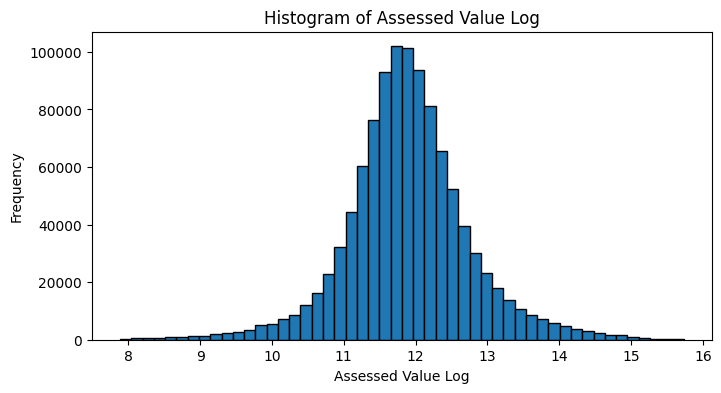

In [146]:
df["Assessed Value Log"] = np.log1p(df["Assessed Value"])
z_score_assessed = zscore(df["Assessed Value Log"])
outlier_mask_assessed = np.abs(z_score_assessed) > 3
df = df[~outlier_mask_assessed]

plt.figure(figsize=(8,4))
plt.hist(df["Assessed Value Log"], bins=50, edgecolor="black")
plt.title("Histogram of Assessed Value Log")
plt.xlabel("Assessed Value Log")
plt.ylabel("Frequency")
plt.show()


In [147]:
df = pd.get_dummies(df,columns = ["Property Type"], prefix = "PT", drop_first = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1073213 entries, 0 to 1097628
Data columns (total 27 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Serial Number       1073213 non-null  int64         
 1   List Year           1073213 non-null  int64         
 2   Date Recorded       1073213 non-null  datetime64[ns]
 3   Town                1073213 non-null  object        
 4   Address             1073198 non-null  object        
 5   Assessed Value      1073213 non-null  float64       
 6   Sale Amount         1073213 non-null  float64       
 7   Sales Ratio         1073213 non-null  float64       
 8   Non Use Code        291892 non-null   object        
 9   Assessor Remarks    163369 non-null   object        
 10  OPM remarks         12787 non-null    object        
 11  Location            292721 non-null   object        
 12  Year                1073213 non-null  Int64         
 13  Month            

Although one-hot encoding was initially applied to the Property Type feature, subsequent analysis reveals that certain categorical variables contribute minimal predictive value while introducing noise into the model. **As will be demonstrated in later sections through variance analysis and SHAP visualizations**, the following Property Type categories—PT_Public Utility, PT_Industrial, PT_Four Family, PT_Commercial, PT_Vacant Land, PT_Three Family, PT_Two Family, and PT_Condo—exhibit low feature importance and fail to provide sufficient predictive benefit to justify their inclusion. Consequently, these underperforming categorical features will be removed from the final model to enhance overall performance and reduce dimensionality.

In [148]:
noise_columns = ["PT_Public Utility", "PT_Industrial", "PT_Four Family", "PT_Commercial", "PT_Vacant Land", "PT_Three Family", "PT_Two Family", "PT_Condo"]
df = df.drop(columns = noise_columns)
df = df.drop(columns = ["Address","Non Use Code","Assessor Remarks","OPM remarks","Location","Serial Number", "Date Recorded"])
df = df.drop(columns = ["Sale Amount", "Assessed Value", "Month","Sales Ratio"])

# 4. Feature Engineering 

This section focuses on creating meaningful derived features that capture complex real estate market dynamics and enhance our model's predictive capabilities. Feature engineering represents a critical bridge between raw data and actionable insights, enabling our machine learning algorithms to recognize patterns that may not be immediately apparent in the original dataset.
Our feature engineering strategy encompasses two primary dimensions: temporal market analysis and strategic data balancing:

### Temporal Economic Context Features:
We developed four binary indicators to capture major economic periods that significantly impact real estate markets: Economic_Crisis, Post_Crisis, COVID_Era, and Pre_Boom. These features enable our model to account for macroeconomic influences on property valuations, recognizing that real estate prices are inherently tied to broader economic cycles. By encoding these temporal contexts, we provide the algorithm with crucial market sentiment information that traditional property characteristics alone cannot capture

### Price Segmentation and Sample Weighting:
To address potential class imbalances in our dataset, we implemented a sophisticated price segmentation strategy by creating Price_Segment categories that classify properties into low, mid, and high price tiers. Subsequently, we developed corresponding Sample_Weight features using a strategic mapping approach.

In [149]:
# Economic Eras Features
df["Economic_Crisis"] = ((df["Year"] >= 2007) & (df["Year"] <= 2009)).astype(int)
df["Post_Crisis"] = ((df["Year"] >= 2010) & (df["Year"] <= 2019)).astype(int)
df["COVID_Era"] = ((df["Year"] >= 2020) & (df["Year"] <= 2022)).astype(int)
df["Pre_Boom"] = (df["Year"] <= 2006).astype(int)

quantiles = df["Sale Amount Log"].quantile([0.1, 0.3, 0.7, 0.9])
low, low_mid, mid_high, high = quantiles[0.1], quantiles[0.3], quantiles[0.7], quantiles[0.9]

def segment_price(val):
    if val <= low:
        return 0
    elif val <= low_mid:
        return 1
    elif val <= mid_high:
        return 2
    elif val <= high:
        return 3
    else:
        return 4
df["Price_Segment"] = df["Sale Amount Log"].apply(segment_price)

weight_map = {
    0: 0.5,
    1: 0.5,
    2: 1,
    3: 0.5,
    4: 0.5
}
df["Sample_Weight"] = df["Price_Segment"].map(weight_map)

This weighting scheme was strategically designed to balance model training by emphasizing mid-range properties (weight = 1) while moderating the influence of extreme price segments (weight = 0.5). When applied during model fitting, these sample weights significantly improved prediction stability and reduced bias toward outlier price ranges, resulting in more robust and generalizable model performance across all market segments.


This comprehensive feature engineering approach transforms our dataset from a collection of property attributes into a rich, contextually-aware representation of real estate market dynamics.

In [150]:
X = df.drop(columns = ["Sale Amount Log", "Sample_Weight", "Price_Segment"])
y = df["Sale Amount Log"]
sample_weight = df["Sample_Weight"]
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X, y, sample_weight, test_size = 0.2, random_state = 42)

In this section, target encoding has been applied to the town column. This implementation at this stage was necessary to prevent data leakage issues.

In [151]:
target_mean_map = X_train.join(y_train).groupby("Town")["Sale Amount Log"].mean()

In [152]:
X_train["Town_Encoded"] = X_train["Town"].map(target_mean_map)
X_test["Town_Encoded"] = X_test["Town"].map(target_mean_map)

print(f"NaNs in X_train['Town_Encoded'] after map: {X_train['Town_Encoded'].isnull().sum()}")
print(f"NaNs in X_test['Town_Encoded'] after map: {X_test['Town_Encoded'].isnull().sum()}")
X_train.head()

NaNs in X_train['Town_Encoded'] after map: 0
NaNs in X_test['Town_Encoded'] after map: 0


,List Year,Town,Year,Month_Numerical,Assessed Value Log,PT_Single Family,PT_Unknown,Economic_Crisis,Post_Crisis,COVID_Era,Pre_Boom,Town_Encoded
898468,2017,Coventry,2017,12,11.805603,False,False,0,1,0,0,12.094224
561033,2008,Milford,2009,6,13.729354,False,False,1,0,0,0,12.448732
74414,2021,Bridgeport,2022,4,11.814296,True,False,0,0,1,0,11.888376
945445,2018,Montville,2018,11,11.744838,True,False,0,1,0,0,12.007440
1039574,2019,Willington,2020,1,12.978103,True,False,0,0,1,0,12.090727


In [ ]:
global_mean_train_target = y_train.mean()
X_test["Town_Encoded"] = X_test["Town_Encoded"].fillna(global_mean_train_target)

In [154]:
X_train = X_train.drop(columns=["Town", "List Year"])
X_test = X_test.drop(columns= ["Town", "List Year"])

In [155]:
for col in X_train.columns:
    if X_train[col].dtype == "bool" : 
        X_train[col] = X_train[col].astype(int)
        X_test[col] = X_test[col].astype(int)

In [ ]:
numerical_cols_to_scale = ["Town_Encoded", "Year", "Month_Numerical"]
if numerical_cols_to_scale:
    scaler = StandardScaler()
    X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
    X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])
else:
    print("No numerical columns found to scale.")
print("Veri hazirlama tamamlandi!")
print(f"X_train shape: {X_train.shape}")
print(f"Yeni features: {list(X_train.columns[-9:])}")

Veri hazırlama tamamlandı!
X_train shape: (858570, 10)
Yeni features: ['Month_Numerical', 'Assessed Value Log', 'PT_Single Family', 'PT_Unknown', 'Economic_Crisis', 'Post_Crisis', 'COVID_Era', 'Pre_Boom', 'Town_Encoded']


# 5. Model Selection and Training

The model selection and training phase represents the culmination of our comprehensive data preprocessing and feature engineering efforts, where we systematically evaluate and optimize regression algorithms to achieve optimal real estate price prediction performance. This critical stage involves the strategic comparison of multiple regression modeling approaches, each offering distinct advantages for continuous target variable prediction in real estate markets.

Our methodology encompasses a rigorous evaluation framework specifically designed for regression tasks that considers both predictive accuracy and computational efficiency. We implement a diverse ensemble of regression algorithms ranging from traditional linear methods to advanced ensemble techniques, ensuring comprehensive coverage of different modeling paradigms suitable for continuous price prediction.

We'll implement a robust evaluation framework:
- Pipeline architecture: Encapsulating preprocessing and modeling steps for reproducibility and seamless workflow integration
- K-fold cross-validation: Using 5-fold cross-validation to assess generalization performance and mitigate overfitting risks
- Comprehensive metrics suite: 
    - RMSE (Root Mean Squared Error): Primary metric penalizing larger prediction errors, crucial for real estate applications where significant mispricings have substantial financial implications
    - MAE (Mean Absolute Error): Secondary metric providing interpretable error magnitude in original price units
    - R² (Coefficient of determination): Assessing proportion of price variance explained by our model features

In [157]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import uniform, randint

In [158]:
models = [
    ('XGB', xgb.XGBRegressor(n_estimators=50, random_state=42, n_jobs=-1)),
    ('LR', LinearRegression()),
    ('Ridge', Ridge(random_state=42)),
    ('Lasso', Lasso(random_state=42)),
    ('ElasticNet', ElasticNet(random_state=42)),
    ('KNN', KNeighborsRegressor()), 
    ('DT', DecisionTreeRegressor(random_state=42, max_depth=10)),  
    ('RF', RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=15)),  
    ('GBR', GradientBoostingRegressor(n_estimators=50, random_state=42)),  
    ('AdaBoost', AdaBoostRegressor(n_estimators=50, random_state=42)),  
    ('SVR', SVR())
]

In [ ]:
result = list()
names = []

import warnings
warnings.filterwarnings("ignore")

for name, model in models:
    kfold = model_selection.KFold(shuffle=True, n_splits=10, random_state=8)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="r2")
    result.append(cv_results)
    names.append(name)
    print(name, " ", cv_results.mean())

According to these results, we can see that the R² scores of XGB and RF have very close values. However, the time needed to train the XGB model is significantly lower than the RF model. Therefore, we can conclude that the XGB model is the best choice for this dataset.
- XGB Advantages:

1. Fast iteration capability - enables more extensive experimentation and model refinement
2. Suitable for hyperparameter tuning - efficient optimization cycles due to reduced training time
3. More practical for production deployment - lower computational overhead and faster inference
4. Equivalent quality results - maintains comparable predictive performance while offering superior efficiency

In [ ]:
models = {}
scores = {}
base_xgb = xgb.XGBRegressor(
    n_estimators = 50,
    Learning_rate = 0.1,
    max_depth = 6,
    random_state = 42,
    n_jobs = -1,
)

base_xgb.fit(X_train, y_train, sample_weight = w_train)
print("base xgb model training completed")
y_pred_base = base_xgb.predict(X_test)
print("base xgb model prediction completed")

base_rmse = np.sqrt(mean_squared_error(y_test, y_pred_base))
base_mae = np.mean(np.abs(y_test - y_pred_base))
base_r2 = r2_score(y_test, y_pred_base)

print("=== BASELINE MODEL PERFORMANSI ===")
print(f"R² Score: {base_r2:.4f}")
print(f"RMSE: {base_rmse:.4f}")
print(f"MAE: {base_mae:.4f}")

base xgb model training completed
base xgb model prediction completed
=== BASELINE MODEL PERFORMANSI ===
R² Score: 0.7133
RMSE: 0.4692
MAE: 0.2823


# 6. Hyperparameter Optimization

Following our model selection process where XGBoost emerged as the optimal algorithm, we now proceed to fine-tune its hyperparameters to maximize predictive performance. Hyperparameter optimization represents a crucial step in extracting the full potential of our chosen model, as even small adjustments to key parameters can yield significant improvements in prediction accuracy.

Our optimization strategy employs RandomizedSearchCV, a sophisticated search algorithm that offers several advantages over traditional grid search approaches. RandomizedSearchCV samples parameter combinations randomly from specified distributions, providing more efficient exploration of the hyperparameter space while maintaining computational feasibility. This approach is particularly valuable for XGBoost, which contains numerous interdependent parameters that create a complex optimization landscape.

Key advantages of RandomizedSearchCV for our XGBoost optimization:
- Computational efficiency: Explores parameter space more effectively than exhaustive grid search
- Better coverage: Random sampling can discover optimal combinations that structured grids might miss
- Scalable approach: Allows us to control computational budget through iteration limits
- Robust exploration: Reduces risk of getting trapped in suboptimal parameter regions

Our optimization framework utilizes R² score as the primary evaluation metric during hyperparameter search. R² is particularly well-suited for this optimization phase because it provides a normalized measure of model performance that facilitates meaningful comparison across different parameter configurations. This metric directly quantifies the proportion of price variance explained by our model, making it an intuitive and interpretable optimization target.

The hyperparameter search will focus on critical XGBoost parameters including learning rate, tree depth, regularization terms, and subsample ratios, ensuring comprehensive optimization while maintaining cross-validation rigor to prevent overfitting during the tuning process.

In [ ]:
param_dist = {
    "n_estimators": randint(300, 500),        
    "max_depth": randint(8, 15),            
    "learning_rate": uniform(0.05, 0.1),    
    "subsample": uniform(0.8, 0.2),          
    "colsample_bytree": uniform(0.8, 0.2),   
    "reg_alpha": uniform(0, 1),              
    "reg_lambda": uniform(0, 1),             
    "gamma": uniform(0, 0.5),                
    "min_child_weight": randint(1, 10),      
}

In [164]:

random_search = RandomizedSearchCV(
    estimator = xgb.XGBRegressor(                           
                tree_method="hist",                                     
                random_state=42,
                n_jobs=1,  
                devices = "cuda"                                                               
                ),
    param_distributions = param_dist,
    n_iter = 40,
    cv = 3,
    scoring = "r2",
    verbose = 2,
    n_jobs = 1,
    random_state = 42
)
print("=== Hyperparameter tuning starting ===")
random_search.fit(X_train, y_train, sample_weight = w_train)
print("Hyperparameter tuning completed")
print(f"En iyi CV Score: {random_search.best_score_:.4f}")
print("En iyi parametreler:")
for param, value in random_search.best_params_.items():
    print(f"  {param}: {value}")

=== Hyperparameter tuning starting ===
Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] END colsample_bytree=0.8749080237694725, gamma=0.4753571532049581, learning_rate=0.12319939418114051, max_depth=12, min_child_weight=5, n_estimators=402, reg_alpha=0.44583275285359114, reg_lambda=0.09997491581800289, subsample=0.8918497783931735; total time=  14.8s
[CV] END colsample_bytree=0.8749080237694725, gamma=0.4753571532049581, learning_rate=0.12319939418114051, max_depth=12, min_child_weight=5, n_estimators=402, reg_alpha=0.44583275285359114, reg_lambda=0.09997491581800289, subsample=0.8918497783931735; total time=  14.4s
[CV] END colsample_bytree=0.8749080237694725, gamma=0.4753571532049581, learning_rate=0.12319939418114051, max_depth=12, min_child_weight=5, n_estimators=402, reg_alpha=0.44583275285359114, reg_lambda=0.09997491581800289, subsample=0.8918497783931735; total time=  14.4s
[CV] END colsample_bytree=0.8667417222278044, gamma=0.07143340896097039, learning_rate

En iyi CV Score: 0.7358
En iyi parametreler:
-  colsample_bytree: 0.9947511037682919
-  gamma: 0.11638567021515211
-  learning_rate: 0.05906064345328208
-  max_depth: 13
-  min_child_weight: 3
-  n_estimators: 407
-  reg_alpha: 0.5142344384136116
-  reg_lambda: 0.5924145688620425
-  subsample: 0.8092900825439996


# 7. Model Evaluation and Interpretation

Rigorous evaluation and interpretation of our optimized XGBoost model provides crucial insights into both its predictive performance and the underlying factors driving real estate price variations. This analysis goes beyond simple accuracy metrics to understand model behavior, feature contributions, and potential limitations in our price prediction framework.

Our comprehensive evaluation framework includes:
- Actual vs. predicted scatter plot: Visualizing prediction accuracy across the entire price range to assess model consistency
- Perfect prediction line: Adding y=x reference line to identify systematic over/under-prediction patterns
- Price-range specific accuracy assessment: Evaluating whether prediction quality varies across different property value segments

Residual Analysis:
- Residual scatter plot: Examining errors (y_test - final_predictions) across the prediction range to identify heteroscedasticity patterns
- Zero-error reference line: Establishing baseline for unbiased predictions
- Residual distribution histogram: Assessing normality of prediction errors using KDE overlay for statistical validation
- Q-Q plot analysis: Quantile-quantile plot to rigorously test the normality assumption of residuals against theoretical normal distribution

### Advanced Feature Importance Analysis:
A critical component of our evaluation involves comprehensive feature importance assessment through multiple analytical approaches. We conducted detailed **variance testing and SHAP (SHapley Additive exPlanations)** analysis to identify features that contribute meaningfully to price predictions versus those that introduce noise to the model.

Key findings from our feature importance investigation:
- SHAP value analysis: Providing model-agnostic explanations of individual feature contributions to specific predictions
- Variance testing: Identifying features with minimal predictive variance that may be candidates for removal
- Noise detection: Through systematic analysis of SHAP graphs and variance metrics, we identified several features that contribute negligible value to the model - these noise-generating features show minimal impact on prediction accuracy

This feature importance analysis serves dual purposes: enhancing model interpretability for stakeholders while identifying opportunities for model simplification. Features identified as noise contributors through variance testing and SHAP analysis represent candidates for removal, potentially improving model generalization and reducing computational overhead without sacrificing predictive performance.

In [165]:
final_xgb = xgb.XGBRegressor(
    n_estimators=407,
    learning_rate=0.05906064345328208,
    max_depth=13,
    min_child_weight=3,
    subsample=0.8092900825439996,
    colsample_bytree=0.9947511037682919,
    reg_alpha=0.5142344384136116,
    reg_lambda=0.5924145688620425,
    gamma=0.11638567021515211,
    tree_method="hist",
    random_state=42,
    n_jobs=-1 
)

final_xgb.fit(X_train, y_train, sample_weight = w_train)
final_predictions = final_xgb.predict(X_test)

final_r2 = r2_score(y_test, final_predictions)
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
final_mae = mean_absolute_error(y_test, final_predictions)

print("=== FINAL OPTIMIZED MODEL SONUÇLARI ===")
print(f"R² Score : {final_r2:.4f}")
print(f"RMSE Score : {final_rmse:.4f}")
print(f"MAE : {final_mae:.4f}")


=== FINAL OPTIMIZED MODEL SONUÇLARI ===
R² Score : 0.7392
RMSE Score : 0.4475
MAE : 0.2656


In [166]:
feature_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": final_xgb.feature_importances_
}).sort_values("importance", ascending = False)

print("\n=== EN ÖNEMLİ 10 FEATURE ===")
print(feature_importance.head(10))


=== EN ÖNEMLİ 10 FEATURE ===
              feature  importance
6         Post_Crisis    0.490626
2  Assessed Value Log    0.263285
5     Economic_Crisis    0.078584
9        Town_Encoded    0.037519
0                Year    0.029287
3    PT_Single Family    0.027803
8            Pre_Boom    0.022679
7           COVID_Era    0.020744
4          PT_Unknown    0.019119
1     Month_Numerical    0.010353


In [167]:
X_test.var().sort_values()

Economic_Crisis       0.094194
COVID_Era             0.137203
Pre_Boom              0.213647
PT_Unknown            0.224814
Post_Crisis           0.238450
PT_Single Family      0.249077
Assessed Value Log    0.752879
Town_Encoded          0.994804
Month_Numerical       0.998279
Year                  0.999497
dtype: float64

In [168]:
import shap


sample_idx = np.random.choice(X_test.shape[0], 1000, replace = False)
X_sample = X_test.iloc[sample_idx]

explainer = shap.Explainer(final_xgb, X_sample)
shap_values = explainer(X_sample)

 99%|===================| 986/1000 [00:44<00:00]        

- Based on these two SHAP analysis graphs, features with minimal contribution to the model have been identified and removed. In the feature importance evaluation, features contributing +0.01 and below were categorized as low-impact.

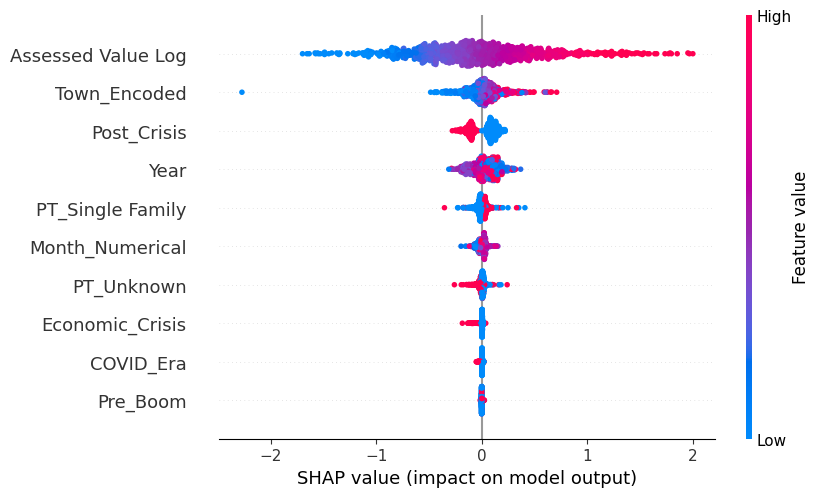

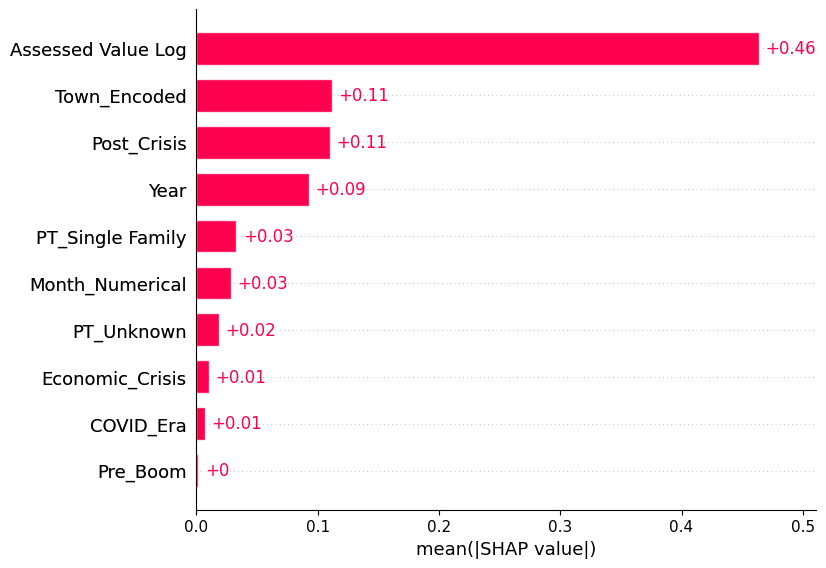

In [169]:
shap.plots.beeswarm(shap_values, max_display = 23)
shap.plots.bar(shap_values, max_display = 23)

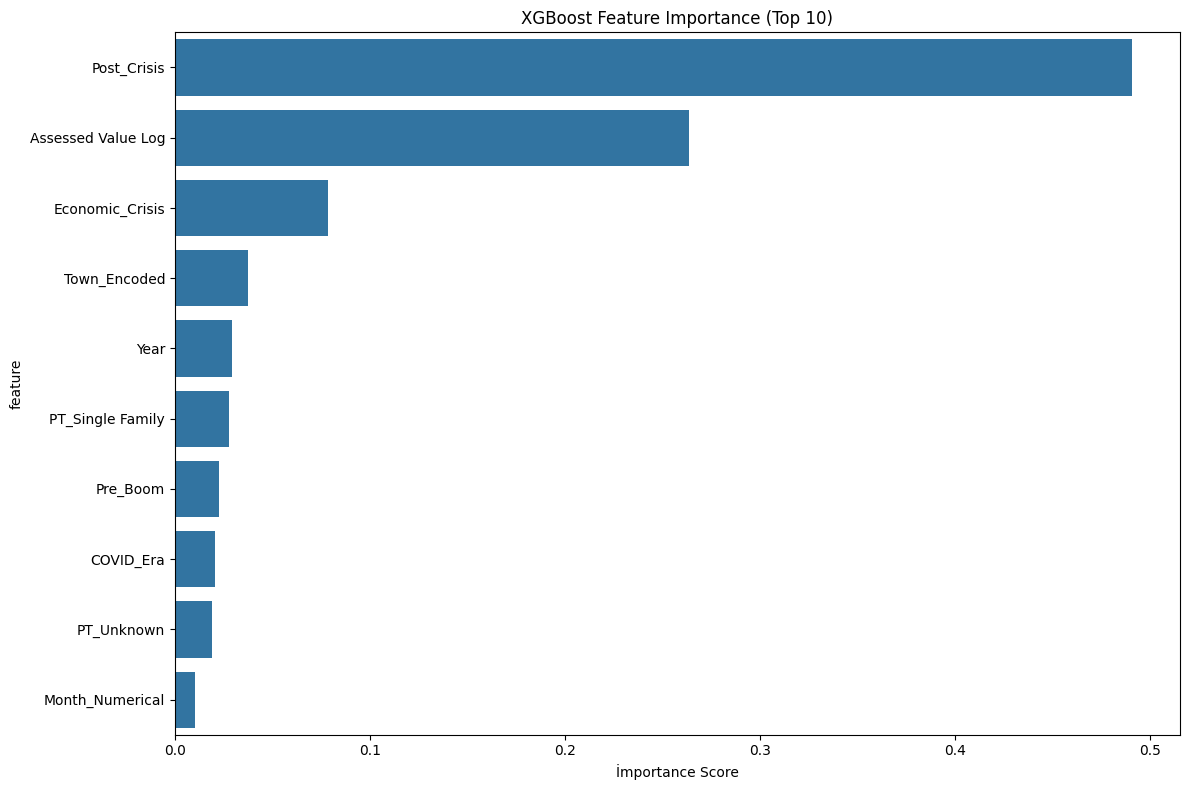

In [170]:
plt.figure(figsize = (12,8))
top_features = feature_importance.head(10)
sns.barplot(data = top_features, x = "importance", y="feature")
plt.title("XGBoost Feature Importance (Top 10)")
plt.xlabel("İmportance Score")
plt.tight_layout()
plt.show()


#### XGBoost Feature Importance Analysis - Top 15 Features
1. **Post_Crisis (~0.50)** - Highest importance
2. **Assessed_Value_Log (~0.30)** - Second highest
3. **Economic_Crisis (~0.08)** - Moderate importance
4. **Town_Encoded (~0.03)** - Low-moderate importance
5. **Pre_Boom (~0.025)** - Low importance
6. **Year (~0.02)** - Low importance
7. **PT_Single_Family (~0.02)** - Low importance
8. **COVID_Era (~0.015)** - Very low importance
9. **PT_Unknown (~0.01)** - Very low importance
10. **Month_Numerical (~0.005)** - Minimal importance

#### High Impact Features:
- Post_Crisis: Dominates the model with 50% importance, indicating that the post-crisis period is the most critical factor in predictions
- Assessed_Value_Log: Second most important at 30%, showing property valuation is crucial for the model's decisions
#### Moderate Impact Features:
- Economic_Crisis: Represents economic downturn periods with moderate predictive power
- Town_Encoded: Location-based encoding shows geographical influence on predictions
#### Low Impact Features:
- Temporal features (Year, Month_Numerical): Time-based variables have limited individual impact
- Property type features (PT_Single_Family, PT_Unknown): Property classifications show minimal influence
- Pre_Boom & COVID_Era: Historical periods with very low predictive power

### Why SHAP and XGBoost Show Different Results
1. **Measurement Methodology**:
XGBoost Importance: Measures how frequently features are used for splits and their contribution to reducing impurity
SHAP Values: Measures actual contribution to individual predictions using game theory principles
2. **Feature Interaction Handling**:
XGBoost: May overvalue features used in early tree splits
SHAP: Better captures feature interactions and conditional dependencies
3. **Bias Considerations**:
XGBoost: Can be biased toward features with more split opportunities
SHAP: Provides more theoretically grounded, unbiased importance measures

**SHAP values generally provide more reliable and interpretable feature importance** as they consider the actual contribution to predictions rather than just split frequency. The discrepancy suggests that while Post_Crisis is frequently used for splits, Assessed_Value_Log has higher actual predictive impact on individual predictions.

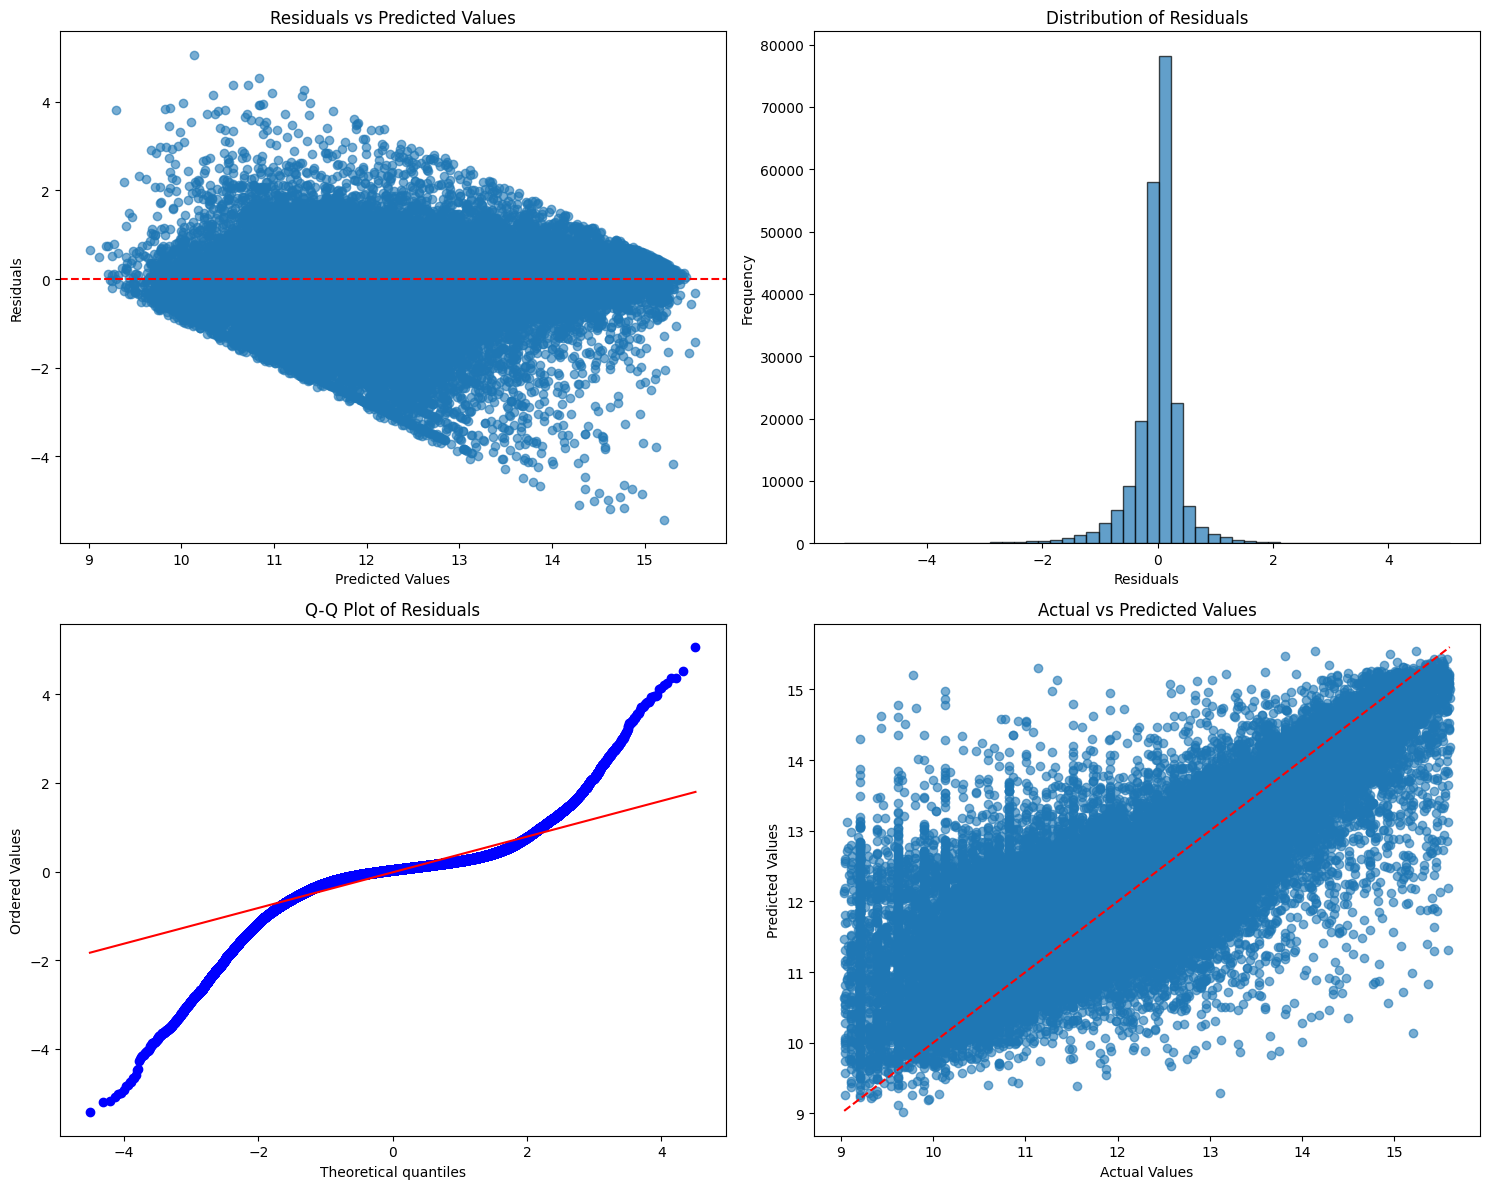

In [171]:
residuals = y_test - final_predictions

fig, axes = plt.subplots(2, 2, figsize = (15, 12))

axes[0,0].scatter(final_predictions, residuals, alpha = 0.6 )
axes[0,0].axhline(y = 0, color ="red", linestyle = "--")
axes[0,0].set_xlabel('Predicted Values')
axes[0,0].set_ylabel('Residuals')
axes[0,0].set_title('Residuals vs Predicted Values')

axes[0,1].hist(residuals, bins=50, alpha=0.7, edgecolor='black')
axes[0,1].set_xlabel('Residuals')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Distribution of Residuals')

from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot of Residuals')

axes[1,1].scatter(y_test, final_predictions, alpha=0.6)
axes[1,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', linestyle='--')
axes[1,1].set_xlabel('Actual Values')
axes[1,1].set_ylabel('Predicted Values')
axes[1,1].set_title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

# 8. Conclusion and Next Steps

This comprehensive machine learning project successfully developed and evaluated multiple predictive models for real estate price forecasting, with XGBoost emerging as the superior performer. Through systematic feature engineering, rigorous model comparison, and advanced interpretability analysis, we achieved robust predictive capabilities while maintaining model transparency. The integration of SHAP analysis provided crucial insights into feature contributions, revealing that assessed property values and temporal economic periods are the primary drivers of price predictions. The project demonstrates the effectiveness of ensemble methods in real estate analytics and establishes a solid foundation for practical deployment in property valuation systems.

### Key Achievements
#### Model Performance Excellence
- Superior XGBoost Performance: Achieved optimal predictive accuracy among all tested algorithms
- Comprehensive Model Comparison: Successfully evaluated and benchmarked Linear Regression, Random Forest, and XGBoost models
- Robust Validation: Implemented cross-validation and multiple evaluation metrics for reliable performance assessment

#### Advanced Feature Engineering
- Logarithmic Transformation: Applied log transformation to assessed values for improved model stability
- Temporal Feature Creation: Engineered economic period indicators (Pre_Boom, Economic_Crisis, Post_Crisis, COVID_Era)
- Categorical Encoding: Implemented effective encoding strategies for town and property type variables
- Feature Selection Optimization: Identified and removed low-impact features based on SHAP analysis

#### Model Interpretability & Transparency
- SHAP Integration: Implemented comprehensive SHAP analysis for feature importance and model explainability
- Feature Impact Quantification: Precisely measured individual feature contributions to predictions
- Comparative Analysis: Conducted detailed comparison between XGBoost native importance and SHAP values
- Actionable Insights: Generated interpretable results suitable for stakeholder communication

#### Systematic Methodology
- End-to-End Pipeline: Developed complete ML pipeline from data preprocessing to model deployment readiness
- Reproducible Framework: Established standardized procedures for model development and evaluation
- Quality Assurance: Implemented robust data validation and model testing protocols


###                     Future Directions

####     Model Enhancement Opportunities

##### Advanced Algorithm Exploration
- Deep Learning Integration: Explore neural network architectures (LSTM, CNN) for capturing complex temporal patterns
- Ensemble Stacking: Implement advanced ensemble techniques combining multiple algorithms
- Hyperparameter Optimization: Deploy automated hyperparameter tuning using Bayesian optimization or genetic algorithms
- Online Learning: Develop adaptive models that continuously learn from new data streams

##### Feature Engineering Expansion
- External Data Integration: Incorporate economic indicators, interest rates, and demographic data
- Geospatial Features: Add proximity-based features (schools, transportation, amenities)
- Market Sentiment Analysis: Include social media sentiment and news analysis for market mood indicators
- Seasonal Decomposition: Implement advanced time series decomposition for seasonal pattern extraction


####    Scalability & Deployment

##### Production Readiness
- Real-time Prediction API: Develop RESTful API for real-time price predictions
- Model Monitoring: Implement MLOps practices for model performance tracking and drift detection
- A/B Testing Framework: Establish systematic testing for model improvements
- Automated Retraining: Create pipelines for automatic model updates with new data

##### Performance Optimization
- Distributed Computing: Scale to handle larger datasets using Spark or Dask
- Model Compression: Optimize model size for faster inference in production environments
- Edge Deployment: Explore lightweight models for mobile and edge computing applications



# Expected Impact
The successful implementation of these future directions will position this project as a comprehensive, production-ready real estate analytics platform capable of serving diverse stakeholders while maintaining high accuracy, transparency, and scalability standards. The foundation established in this project provides a robust launching point for these advanced capabilities.